In [1]:
# 01_EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Load data
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/Processed_dataset/merged_data.csv", parse_dates=["Date"])

# Quick overview
print("Shape:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n")
print(df.isnull().sum())

# Display first few rows
df.head()

Shape: (421570, 21)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object   

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,A,151315,2010,2,5,4,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,A,151315,2010,2,6,4,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,A,151315,2010,2,7,4,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,A,151315,2010,2,8,4,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,A,151315,2010,3,9,4,5


### 🧪 1. Distribution of Weekly Sales

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


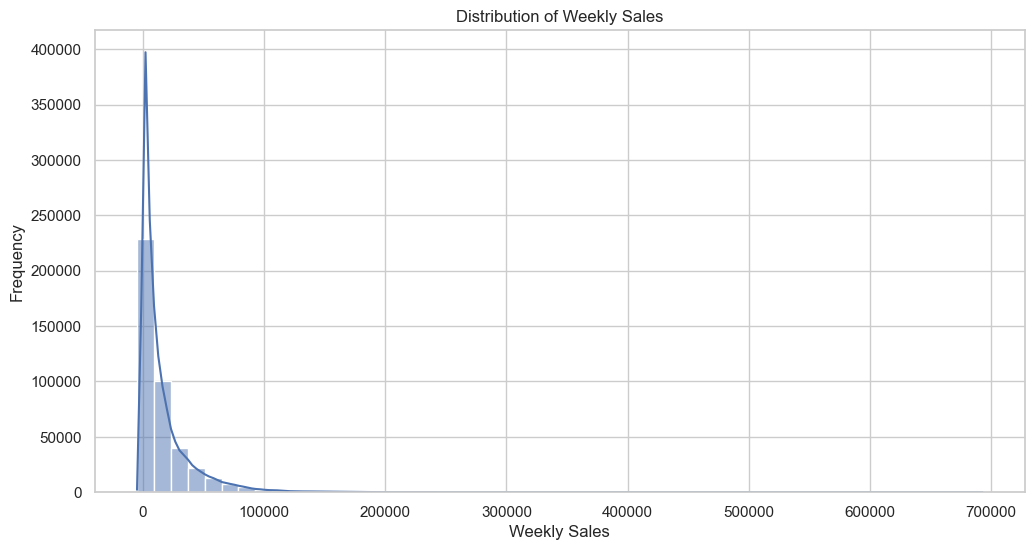

In [45]:
sns.histplot(df["Weekly_Sales"], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/weekly_sales.png")
plt.show()

### 🏪 2. Average Sales by Store

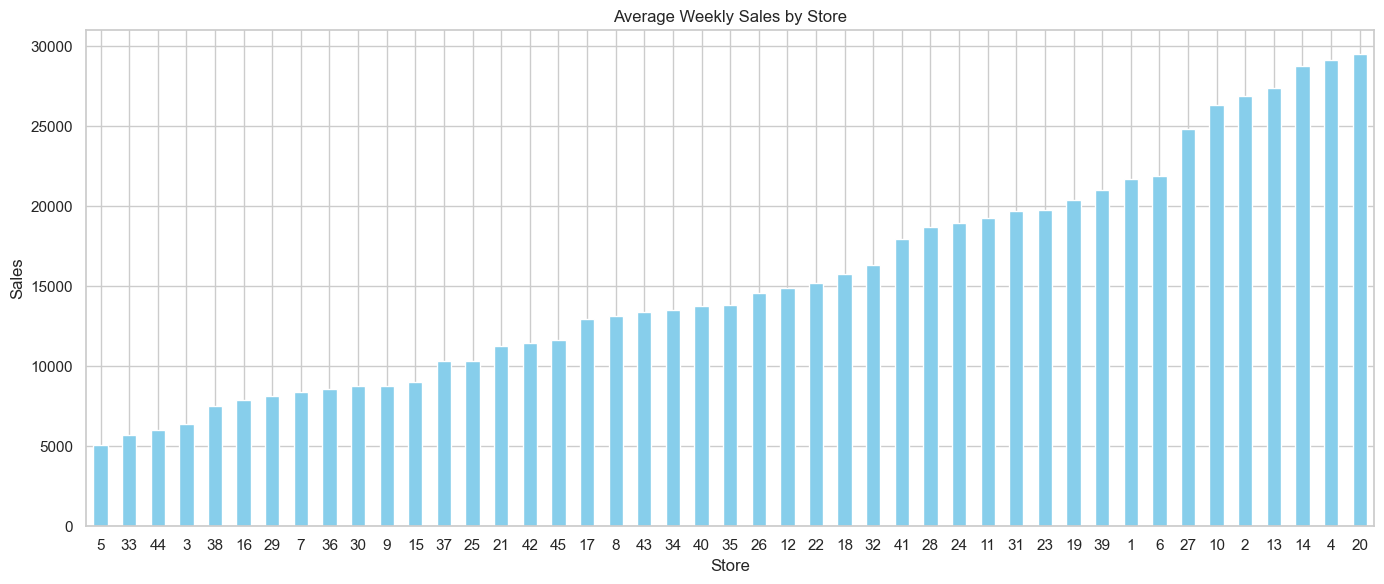

In [47]:
store_sales = df.groupby("Store")["Weekly_Sales"].mean().sort_values()

store_sales.plot(kind="bar", figsize=(14,6), color="skyblue")
plt.title("Average Weekly Sales by Store")
plt.ylabel("Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.tight_layout()
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/AVG_Sales_by_store.png")
plt.show()

### 📆 3. Sales Over Time (Time Series)

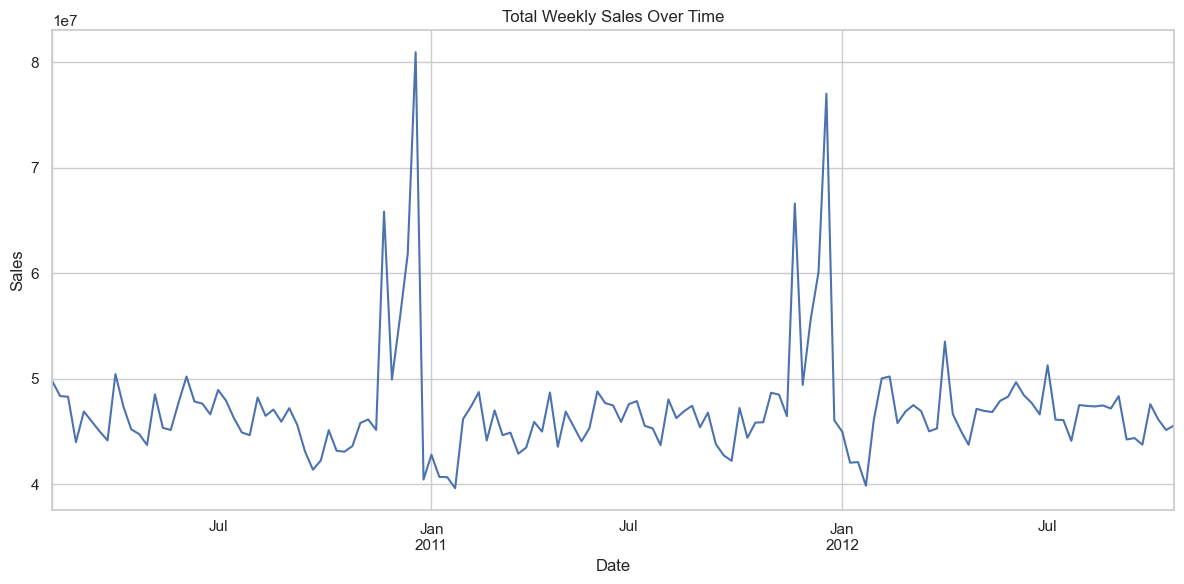

In [49]:
weekly_sales_ts = df.groupby("Date")["Weekly_Sales"].sum()

weekly_sales_ts.plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.tight_layout()
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/sales_over_time.png")
plt.show()

### 🛒 4. Sales by Department

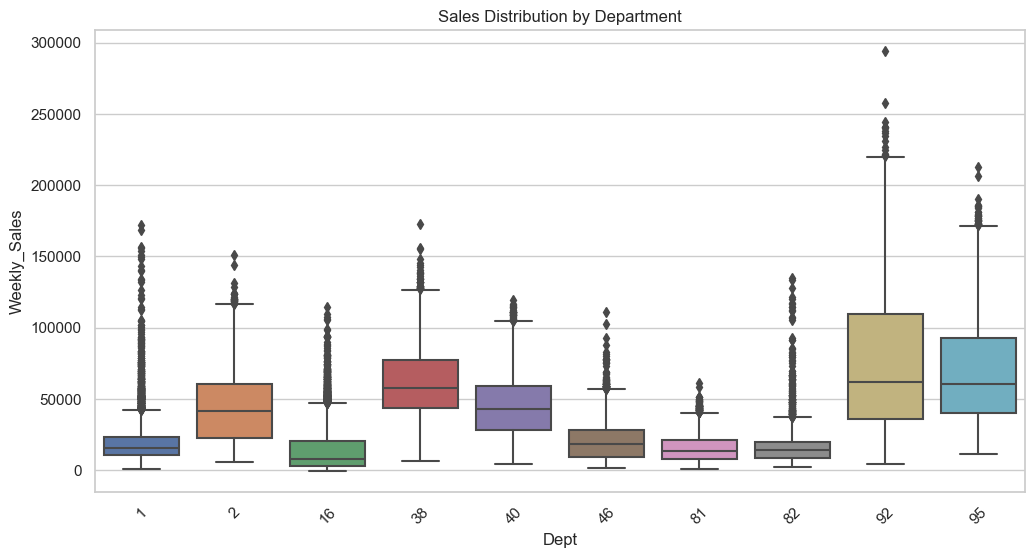

In [51]:
top_depts = df["Dept"].value_counts().head(10).index
dept_sales = df[df["Dept"].isin(top_depts)]

sns.boxplot(data=dept_sales, x="Dept", y="Weekly_Sales")
plt.title("Sales Distribution by Department")
plt.xticks(rotation=45)
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/sales_by_department.png")
plt.show()

### 🎄 5. Impact of Holidays

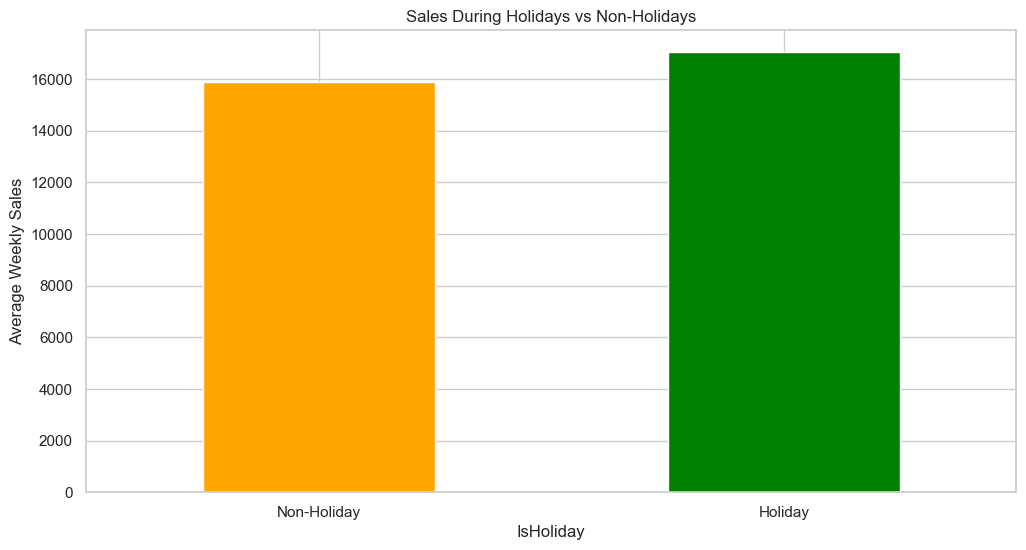

In [53]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()

holiday_sales.plot(kind="bar", color=["orange", "green"])
plt.xticks([0,1], ["Non-Holiday", "Holiday"], rotation=0)
plt.ylabel("Average Weekly Sales")
plt.title("Sales During Holidays vs Non-Holidays")
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/holidays_impact.png")
plt.show()

### 📊 6. Correlation Heatmap

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


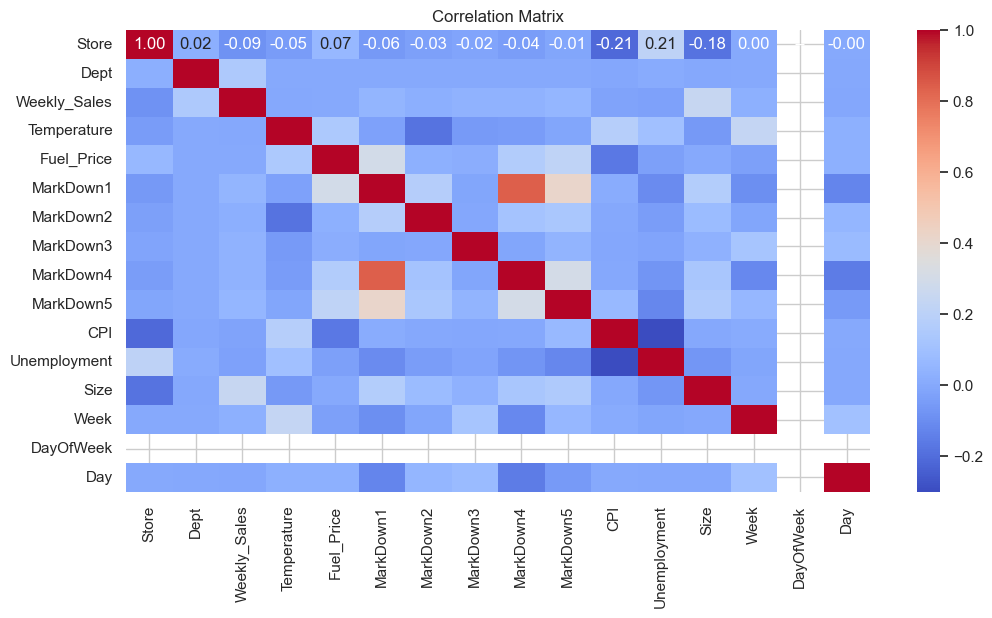

In [55]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"])

corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/correlation_matrics.png")
plt.show()

### 🗓️ 7. Monthly and Yearly Trends

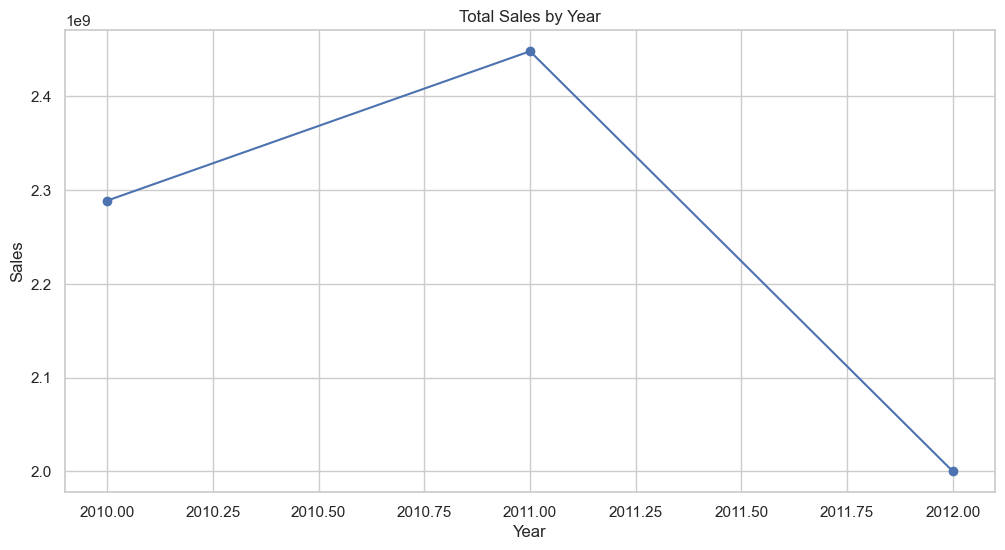

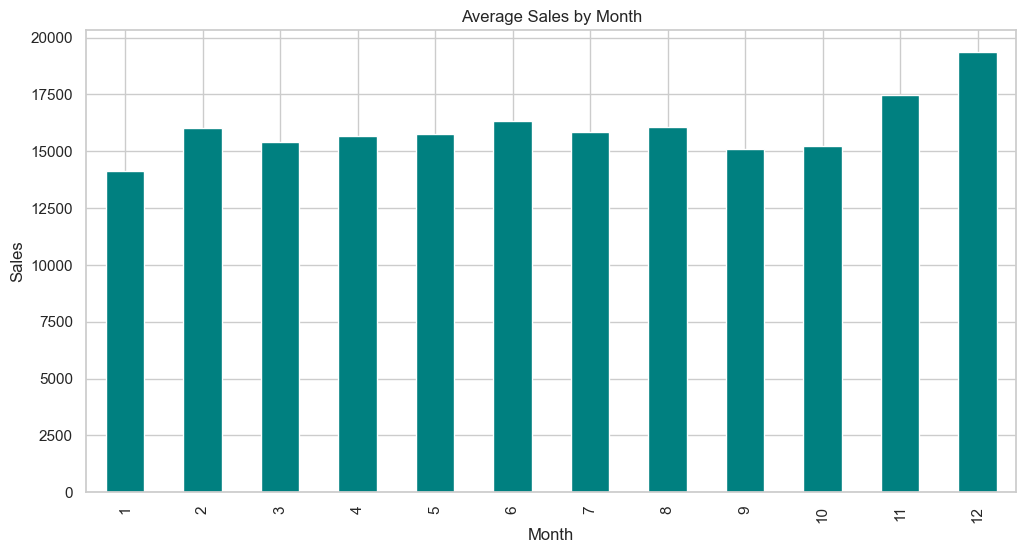

In [57]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Yearly
yearly_sales = df.groupby("Year")["Weekly_Sales"].sum()
yearly_sales.plot(marker="o")
plt.title("Total Sales by Year")
plt.ylabel("Sales")
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/Yearly_trends.png")
plt.show()

# Monthly
monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()
monthly_sales.plot(kind="bar", color="teal")
plt.title("Average Sales by Month")
plt.ylabel("Sales")
# Save the Images
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/06_Reports/Monthly_trends.png")
plt.show()

### 🏬 8. Sales by Store Type and Size

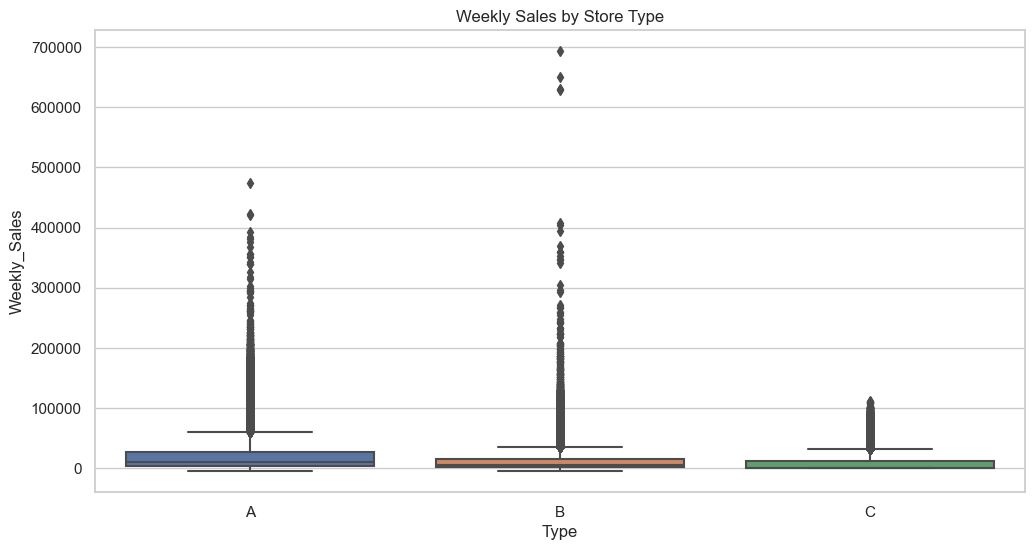

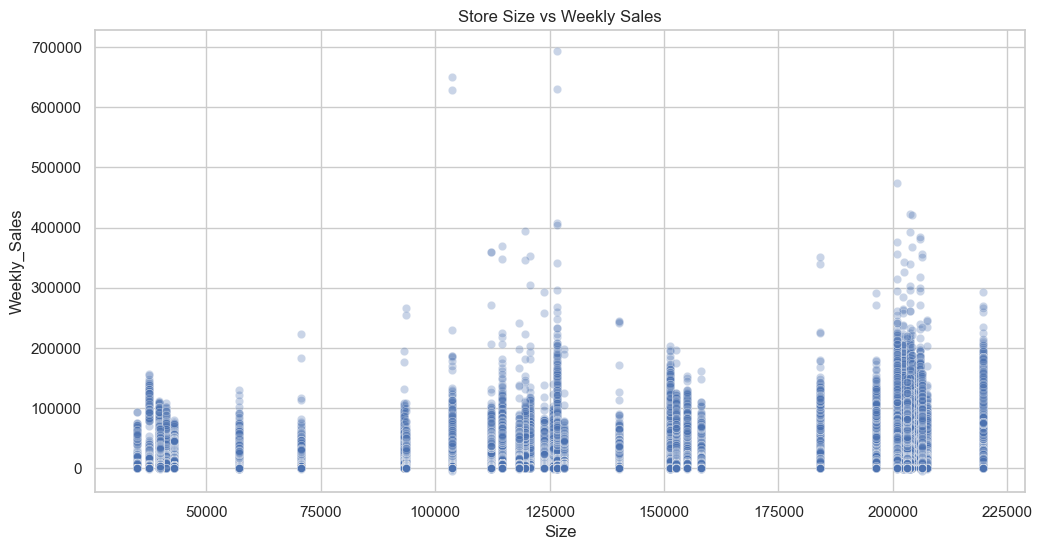

In [25]:
sns.boxplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Weekly Sales by Store Type")
plt.show()

sns.scatterplot(x="Size", y="Weekly_Sales", data=df, alpha=0.3)
plt.title("Store Size vs Weekly Sales")
plt.show()